### Plotting snap shot of model surface speed

In [25]:
import numpy as np
import sys
sys.path.append("../src/")

import matplotlib.pyplot as plt 
%matplotlib inline

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

In [26]:
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.5
    , 'legend.markerscale': 1.})
plt.rc('xtick', labelsize=25) 
plt.rc('ytick', labelsize=25)

In [27]:
lw1=4
aph=.7
sc = 20.

In [28]:
import dp_map
dpmap = dp_map.drake_passage_map(fig_label="b",fig_title="llc 4320 simulation")
m = dpmap.m

In [29]:
data_path = 'data/uv_0m_single_file.nc'
data = Dataset(data_path)

In [30]:
flat = (data.variables['lat'][:] > -62) & (data.variables['lat'][:] < -55)
lon,lat = np.meshgrid(data.variables['lon'],data.variables['lat'][:][flat])
lon,lat = m(lon,lat)

In [31]:
it = 7  # choose an arbitrary snapshot
speed = np.sqrt((data.variables['u'][flat,:,it]**2 +\
                 data.variables['v'][flat,:,it]**2))
speed = np.ma.masked_array(speed,speed>1.26)

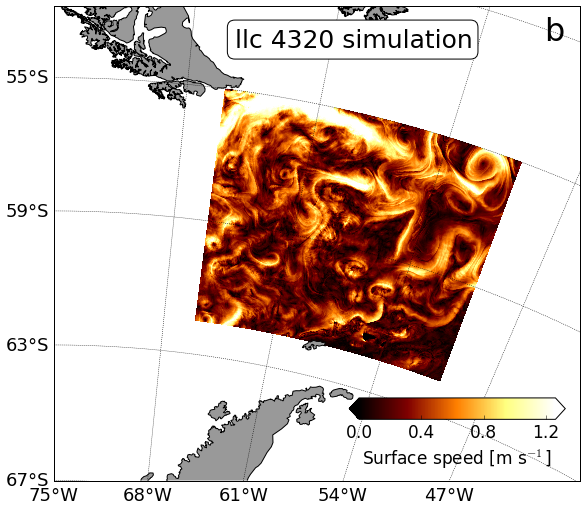

In [34]:
fig = plt.figure(facecolor='w', figsize=(12.,8.5))

pc = m.pcolor(lon,lat,speed,cmap='afmhot',vmin=0,vmax=1.26)

m.fillcontinents(color='.60',lake_color='none')
dpmap.draw_par_mer()
m.drawcoastlines()
dpmap.set_label(pos=(1650212,1475371))
dpmap.set_title(pos=(1000212,1475371))


axColor = plt.axes([.55,.225,.25,.035])
cb = plt.colorbar(pc, cax = axColor, orientation="horizontal",
                  extend='both')

cb.set_label(u'Surface speed [m s$^{-1}$]',fontsize=17)
cb.set_ticks(np.arange(0,1.6,.4))
cb.ax.tick_params(labelsize=17) 


plt.savefig('figs/model_snapshot_speed',dpi=300,bbox_inches='tight')